In [137]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from Funciones_auxiliares import plot_Bulk
from scipy.interpolate import UnivariateSpline


### Importamos los datos, y separamos en Noise,Neuron y Multiunit

In [2]:
data = pd.read_pickle('Datos/PCCIBNMZc')
#data.drop(columns = 'Bulk',inplace = True)
noise = data[data.bNoise == 1]
neuron = data[data.bNoise == 0]
MU = data[data.bNoise == 2]

In [3]:
data.columns

Index(['PatientExperiment', 'Channel', 'Cluster', 'ISI', 'Bulk', 'bNoise',
       'Mean', 'ZeroCrossings'],
      dtype='object')

In [4]:
print(len(noise))
print(len(neuron))
print(len(MU))

1050
316
204


### Ejemplo de la media

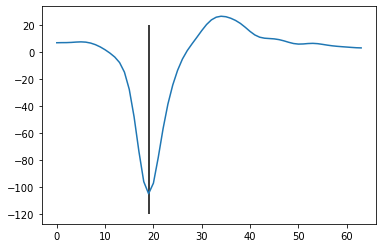

In [5]:
fig = plt.figure()
ax = fig.subplots(1)
x = neuron.Mean.iloc[10]
ax.plot(np.arange(len(x)),x)
plt.vlines(x = 19,ymin = -120,ymax = 20)

### Puede verse que el pico de cada spike se encuentra en el elemento 20 (i = 19)

In [6]:
data['Amplitude'] = data.Mean.apply(lambda row: row[19])

<BarContainer object of 20 artists>

<BarContainer object of 20 artists>

<BarContainer object of 20 artists>

Text(0.5, 1.0, 'Amplitude')

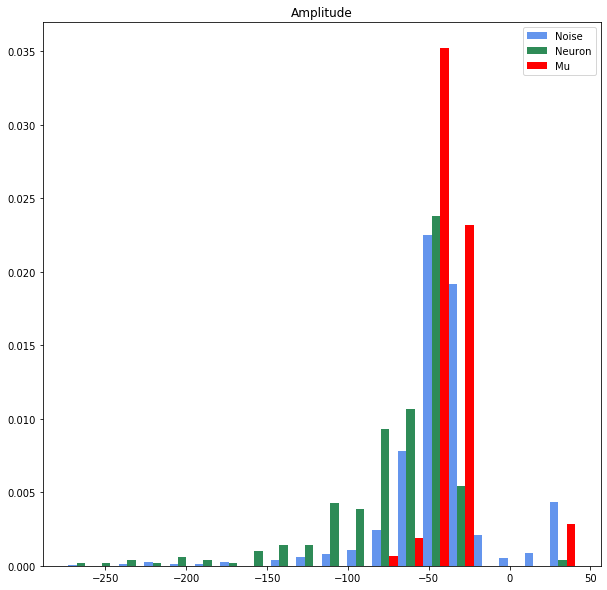

In [7]:
fig, ax = plt.subplots(figsize = (10,10))
neuron_heights,neuron_bins = np.histogram(data[data.bNoise == 0].Amplitude,bins = 20)
noise_heights,noise_bins = np.histogram(data[data.bNoise == 1].Amplitude,bins = neuron_bins)
mu_heights,mu_bins = np.histogram(data[data.bNoise == 2].Amplitude,bins = neuron_bins)

width = (noise_bins[1] - noise_bins[0])
neuron_heights = neuron_heights/(sum(neuron_heights)*width)
noise_heights = noise_heights/(sum(noise_heights)*width)
mu_heights = mu_heights/(sum(mu_heights)*width)

width = (noise_bins[1] - noise_bins[0])/3

ax.bar(noise_bins[:-1], noise_heights, width=width, facecolor='cornflowerblue',label = "Noise")
ax.bar(neuron_bins[:-1]+width, neuron_heights, width=width, facecolor='seagreen',label = "Neuron")
ax.bar(neuron_bins[:-1]+2*width, mu_heights, width=width, facecolor='red',label = "Mu" )

plt.legend()
plt.title("Amplitude")

### Amplitude peak to peak

In [8]:
data['Amplitude_peaktopeak'] = data.Mean.apply(lambda row: np.max(row) - np.min(row))

<BarContainer object of 20 artists>

<BarContainer object of 20 artists>

<BarContainer object of 20 artists>

Text(0.5, 1.0, 'Amplitude peak to peak')

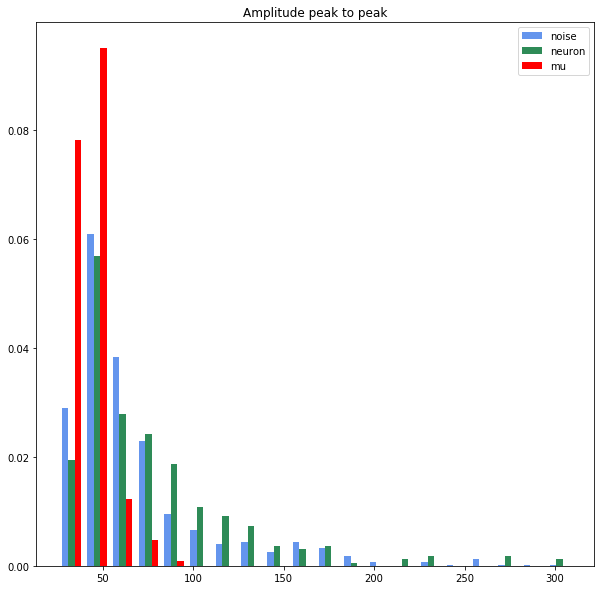

In [9]:
fig, ax = plt.subplots(figsize = (10,10))
neuron_heights,neuron_bins = np.histogram(data[data.bNoise == 0].Amplitude_peaktopeak,bins = 20)
noise_heights,noise_bins = np.histogram(data[data.bNoise == 1].Amplitude_peaktopeak,bins = neuron_bins)
mu_heights,mu_bins = np.histogram(data[data.bNoise == 2].Amplitude_peaktopeak,bins = neuron_bins)

neuron_heights = neuron_heights/(sum(neuron_heights)*width)
noise_heights = noise_heights/(sum(noise_heights)*width)
mu_heights = mu_heights/(sum(mu_heights)*width)

width = (noise_bins[1] - noise_bins[0])/4

ax.bar(noise_bins[:-1], noise_heights, width=width, facecolor='cornflowerblue',label = "noise")
ax.bar(neuron_bins[:-1]+width, neuron_heights, width=width, facecolor='seagreen',label = "neuron")
ax.bar(neuron_bins[:-1]+2*width, mu_heights, width=width, facecolor='red',label = "mu")
plt.legend()
plt.title("Amplitude peak to peak")

In [10]:
m1 = data[data.bNoise == 0].Amplitude_peaktopeak.mean()
l1 = len(data[data.bNoise == 0].Amplitude_peaktopeak)
m2 = data[data.bNoise == 2].Amplitude_peaktopeak.mean()
l2 = len(data[data.bNoise == 2].Amplitude_peaktopeak)
s1 = data[data.bNoise == 0].Amplitude_peaktopeak.std()
s2 = data[data.bNoise == 2].Amplitude_peaktopeak.std()

z = (m1 - m2)/np.sqrt(s1/l1 + s2/l2)
z

80.6287338072072

,PatientExperiment,Channel,Cluster,ISI,Bulk,bNoise,Mean,ZeroCrossings,Amplitude,Amplitude_peaktopeak
450,HEC017\017context1\017context1_prescr,107,1,"[0, 16, 32, 27, 11, 19, 34, 24, 18, 23, 24, 20...","[[-0.5022087772486994, -0.7570957287800967, -6...",0,"[2.5889375403704613, 3.238523797766915, 3.5984...",4,-39.516137,47.750134
451,HEC017\017context1\017context1_prescr,108,1,"[0, 15, 28, 21, 21, 28, 47, 37, 27, 33, 28, 27...","[[-0.8039600986828503, -5.106483972215248, -4....",0,"[2.888506387964795, 3.2857403522152815, 3.5042...",2,-36.043086,43.338600
455,HEC017\017context1\017context1_prescr,109,2,"[0, 90, 537, 338, 298, 171, 161, 149, 126, 112...","[[14.850080825134437, 10.044594544432831, -0.9...",0,"[4.921244365834821, 5.305847401886366, 5.48292...",2,-40.032171,47.623862
458,HEC017\017context1\017context1_prescr,111,1,"[0, 408, 162, 203, 75, 76, 57, 65, 58, 62, 78,...","[[11.07369178086354, 5.924531485799744, 7.4733...",0,"[4.453470841617727, 4.485020865311145, 4.42454...",2,-36.157333,44.452508
460,HEC017\017context1\017context1_prescr,112,1,"[0, 69, 318, 260, 161, 126, 104, 114, 95, 77, ...","[[0.23889132557140236, 1.4646041034658785, 4.4...",0,"[4.433098513579291, 4.772398223850272, 4.86248...",2,-36.385746,44.077525
462,HEC017\017context1\017context1_prescr,113,1,"[0, 6, 9, 14, 7, 8, 6, 4, 10, 5, 4, 6, 5, 8, 6...","[[0.028840555280716718, -3.811504702359728, -7...",0,"[3.082052773926598, 3.8494951053011324, 4.3364...",2,-35.935299,43.558487
465,HEC017\017context1\017context1_prescr,114,2,"[0, 16, 9, 5, 6, 9, 7, 4, 3, 5, 1, 8, 0, 4, 2,...","[[5.663036020027322, 3.060711974239128, 4.0073...",0,"[3.9878540896052375, 4.602476194927192, 5.0144...",2,-36.149304,41.283342
466,HEC017\017context1\017context1_prescr,115,1,"[0, 3, 9, 5, 2, 2, 5, 1, 1, 4, 2, 4, 4, 3, 0, ...","[[2.2680003736319714, -1.7307194843249958, -4....",0,"[3.1258517992932164, 3.4761309254815225, 3.678...",2,-38.322134,45.307623
469,HEC017\017context1\017context1_prescr,116,2,"[0, 4, 10, 2, 2, 3, 6, 2, 2, 2, 1, 3, 4, 1, 1,...","[[1.4854699457849019, 0.21634422599534756, -0....",0,"[3.645251460326459, 4.137248378815186, 4.30954...",2,-37.466684,44.027597
471,HEC017\017context1\017context1_prescr,118,1,"[0, 5, 7, 3, 4, 1, 1, 0, 2, 1, 2, 2, 3, 1, 1, ...","[[8.03702579723716, 5.537183146968905, 5.62763...",0,"[3.5695350541685333, 4.184252443709786, 4.7853...",2,-37.528333,42.699317


<Figure size 432x288 with 0 Axes>

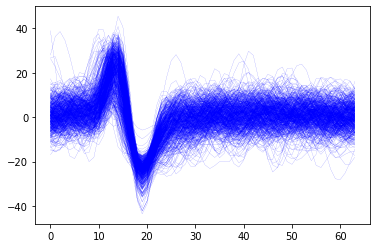

In [11]:
data[(data.Amplitude_peaktopeak > 40) & (data.Amplitude_peaktopeak < 50) & (data.bNoise == 0)]
plt.figure()
ax = plt.subplot(111)
plot_Bulk(data.loc[1446,"Bulk"],ax)

In [12]:
data["MeanSTD"] = data.Bulk.apply(lambda row: row.std())

<BarContainer object of 20 artists>

<BarContainer object of 20 artists>

<BarContainer object of 20 artists>

Text(0.5, 1.0, 'Standard deviation (Mean)')

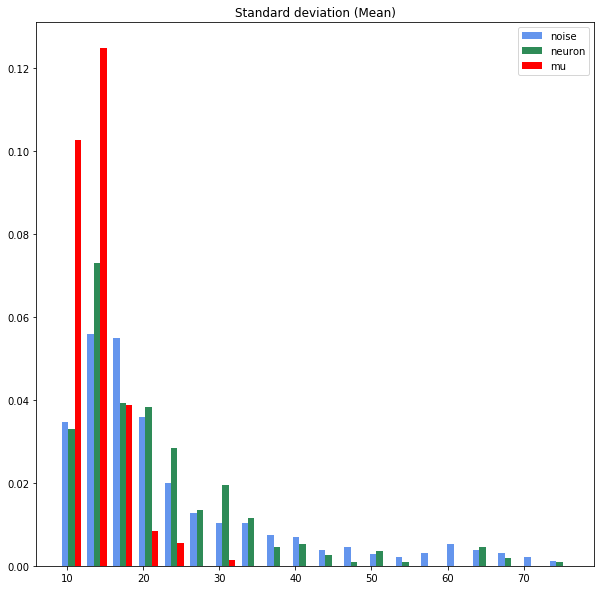

In [13]:
fig, ax = plt.subplots(figsize = (10,10))
neuron_heights,neuron_bins = np.histogram(data[data.bNoise == 0].MeanSTD,bins = 20)
noise_heights,noise_bins = np.histogram(data[data.bNoise == 1].MeanSTD,bins = neuron_bins)
mu_heights,mu_bins = np.histogram(data[data.bNoise == 2].MeanSTD,bins = neuron_bins)

neuron_heights = neuron_heights/(sum(neuron_heights)*width)
noise_heights = noise_heights/(sum(noise_heights)*width)
mu_heights = mu_heights/(sum(mu_heights)*width)

width = (noise_bins[1] - noise_bins[0])/4

ax.bar(noise_bins[:-1], noise_heights, width=width, facecolor='cornflowerblue',label = "noise")
ax.bar(neuron_bins[:-1]+width, neuron_heights, width=width, facecolor='seagreen',label = "neuron")
ax.bar(neuron_bins[:-1]+2*width, mu_heights, width=width, facecolor='red',label = "mu")
plt.legend()
plt.title("Standard deviation (Mean)")

## Computamos la derivada de la media

### Derivatie in the peak

<BarContainer object of 20 artists>

<BarContainer object of 20 artists>

<BarContainer object of 20 artists>

Text(0.5, 1.0, 'derivative in the peak')

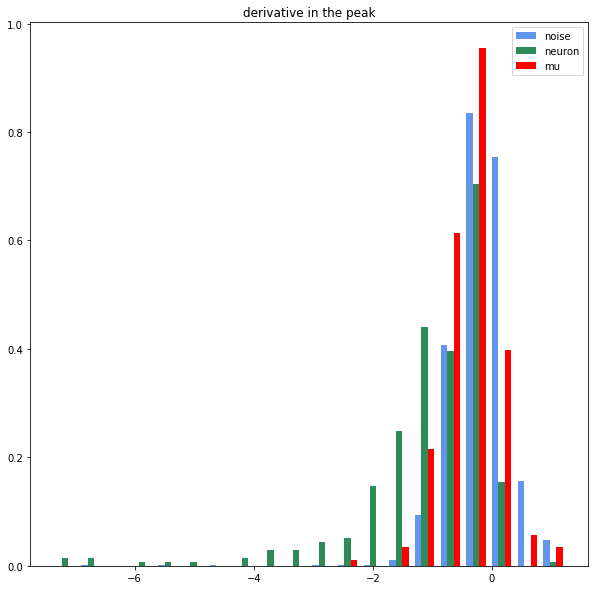

In [14]:
i = 19
data['derivative_peak'] = data.Mean.apply(lambda row: np.gradient(row)[i])
fig, ax = plt.subplots(figsize = (10,10))
neuron_heights,neuron_bins = np.histogram(data[data.bNoise == 0].derivative_peak,bins = 20)
noise_heights,noise_bins = np.histogram(data[data.bNoise == 1].derivative_peak,bins = neuron_bins)
mu_heights,mu_bins = np.histogram(data[data.bNoise == 2].derivative_peak,bins = neuron_bins)

width = (noise_bins[1] - noise_bins[0])

neuron_heights = neuron_heights/(sum(neuron_heights)*width)
noise_heights = noise_heights/(sum(noise_heights)*width)
mu_heights = mu_heights/(sum(mu_heights)*width)

width = (noise_bins[1] - noise_bins[0])/4

ax.bar(noise_bins[:-1], noise_heights, width=width, facecolor='cornflowerblue',label = "noise")
ax.bar(neuron_bins[:-1]+ width, neuron_heights, width=width, facecolor='seagreen',label = "neuron")
ax.bar(neuron_bins[:-1]+ 2*width, mu_heights, width=width, facecolor='red',label = "mu")
plt.legend()
plt.title("derivative in the peak")

### Max Derivative

<BarContainer object of 20 artists>

<BarContainer object of 20 artists>

<BarContainer object of 20 artists>

Text(0.5, 1.0, 'Max derivative')

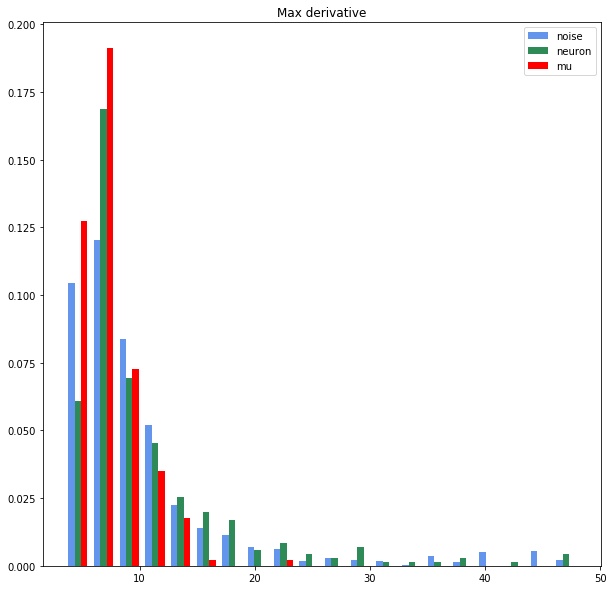

In [32]:
data['derivative_max'] = data.Mean.apply(lambda row: max(np.gradient(row)))
fig, ax = plt.subplots(figsize = (10,10))
neuron_heights,neuron_bins = np.histogram(data[data.bNoise == 0].derivative_max,bins = 20)
noise_heights,noise_bins = np.histogram(data[data.bNoise == 1].derivative_max,bins = neuron_bins)
mu_heights,mu_bins = np.histogram(data[data.bNoise == 2].derivative_max,bins = neuron_bins)

width = (noise_bins[1] - noise_bins[0])

neuron_heights = neuron_heights/(sum(neuron_heights)*width)
noise_heights = noise_heights/(sum(noise_heights)*width)
mu_heights = mu_heights/(sum(mu_heights)*width)

width = (noise_bins[1] - noise_bins[0])/4

ax.bar(noise_bins[:-1], noise_heights, width=width, facecolor='cornflowerblue',label = "noise")
ax.bar(neuron_bins[:-1]+width, neuron_heights, width=width, facecolor='seagreen',label = "neuron")
ax.bar(neuron_bins[:-1]+2*width, mu_heights, width=width, facecolor='red',label = "mu")
plt.legend()
plt.title("Max derivative")

### Numero de Zero Crossings

In [33]:
def zero_crossings(sign):
    return len(np.where(np.diff(np.sign(sign)))[0])

In [34]:
data['ZeroCrossings'] = data.Mean.apply(lambda row: zero_crossings(row))

<BarContainer object of 9 artists>

<BarContainer object of 9 artists>

<BarContainer object of 9 artists>

Text(0.5, 1.0, 'Zero crossings')

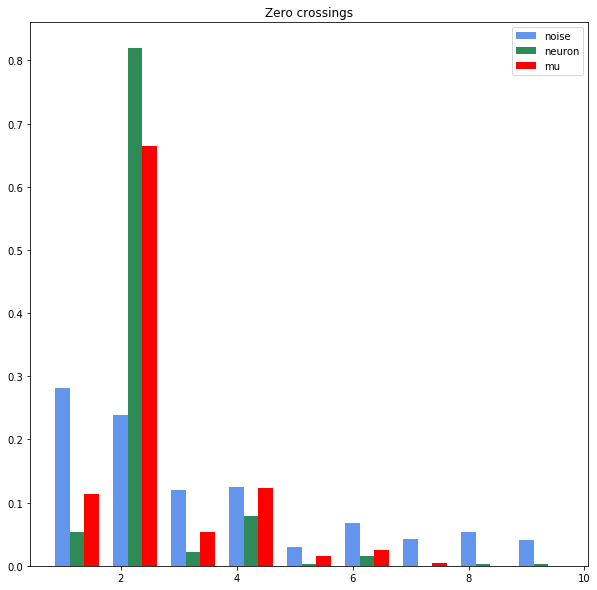

In [35]:
fig, ax = plt.subplots(figsize = (10,10))
neuron_heights,neuron_bins = np.histogram(data[data.bNoise == 0].ZeroCrossings,bins = 9)
noise_heights,noise_bins = np.histogram(data[data.bNoise == 1].ZeroCrossings,bins = neuron_bins)
mu_heights,mu_bins = np.histogram(data[data.bNoise == 2].ZeroCrossings,bins = neuron_bins)


width = (noise_bins[1] - noise_bins[0])

neuron_heights = neuron_heights/(sum(neuron_heights)*width)
noise_heights = noise_heights/(sum(noise_heights)*width)
mu_heights = mu_heights/(sum(mu_heights)*width)

width = (noise_bins[1] - noise_bins[0])/4

ax.bar(noise_bins[:-1], noise_heights, width=width, facecolor='cornflowerblue',label = "noise")
ax.bar(neuron_bins[:-1]+width, neuron_heights, width=width, facecolor='seagreen',label = "neuron")
ax.bar(neuron_bins[:-1]+2*width, mu_heights, width=width, facecolor='red',label = "mu")
plt.legend()
plt.title("Zero crossings")

### ISI

In [43]:
def Isi_pc(Isi_example,i):
    suma = np.sum(Isi_example)
    if suma < 5: return 0
    else:
        return np.sum(Isi_example[[i,2*i,3*i,4*i]])/suma
    

<Figure size 432x288 with 0 Axes>

array([ 0,  2, 33,  3,  9, 10,  6,  4,  1,  3,  4,  1,  2,  1,  5,  7,  4,
        1,  2, 36, 42,  3,  3,  1,  2,  1,  1,  2,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  2,  0,  7,  9,  1,  0,  0,  1,  0,  0,  0,  2,  0,  0,
        0,  0,  1,  0,  0,  2,  1,  0,  3,  7,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  1,  0,  0,  0,  1,  0,  1,  1,  1,  4,  0,  1,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  1,  0,  1,  0,  2])

<BarContainer object of 100 artists>

42

0.3224341507720254

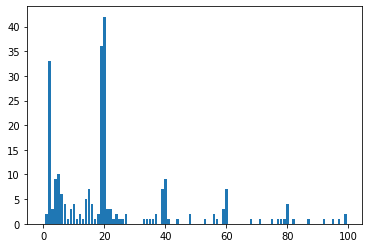

In [100]:
band = 20
plt.close("all")
data["ISI_noisy_band"] = data.ISI.apply(Isi_pc,args=(band,))
plt.figure()
i = 1474
data.ISI.iloc[i]
plt.bar(np.arange(0,len(data.ISI.iloc[i])),data.ISI.iloc[i])
data.ISI.iloc[i][band]
pc.iloc[58]


In [45]:
x = []
threshold_list = np.linspace(0,1,1000)
Noise_pc = pc[data.bNoise == 1]
Neuron_pc = pc[data.bNoise == 0]
MU_pc = pc[data.bNoise == 2]

for t in threshold_list:
    Noise_eliminated = len(Noise_pc[Noise_pc >=t])/len(Noise_pc)
    Neuron_eliminated = len(Neuron_pc[Neuron_pc >=t])/len(Neuron_pc)
    MU_eliminated = len(MU_pc[MU_pc >=t])/len(MU_pc)
    x.append([Noise_eliminated,Neuron_eliminated,MU_eliminated])
x = np.array(x).T
x *= 100

In [46]:
#plt.plot(data.loc[i].Mean)

In [47]:
Neuron_pc[Neuron_pc > .8]

1473    0.844138
Name: ISI, dtype: float64

<Figure size 720x720 with 0 Axes>

Text(0, 0.5, '% clusters')

Text(0.5, 0, '% ISI in 50Hz band')

Text(0.5, 1.0, 'ISI')

16.28571428571429

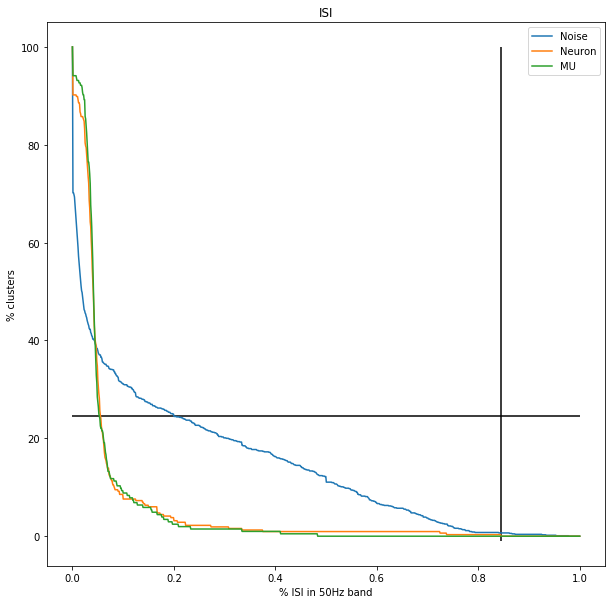

In [51]:
plt.figure(figsize = (10,10))
plt.plot(threshold_list,x[0],label = 'Noise')
plt.plot(threshold_list,x[1],label = 'Neuron')
plt.plot(threshold_list,x[2],label = 'MU')
plt.legend()
plt.ylabel('% clusters')
plt.xlabel('% ISI in 50Hz band')
plt.title("ISI")

unit_min = np.min([np.where(x[1] == 0)[0]])

mu_min = np.min([np.where(x[2] == 0)[0]])

s = np.max([unit_min,mu_min])
thres = threshold_list[s]

if thres == 0: print("No threshold")
else: plt.vlines(thres,-1,100)
    
plt.hlines(x[0][200],0,1)
x[0][400]

#### Distribucion de los porcentajes de ISI

In [25]:
Neuron_pc

3       0.000000
12      0.041667
34      0.000000
35      0.000000
47      0.000000
          ...   
1514    0.042221
1523    0.042484
1535    0.032808
1543    0.737288
1552    0.025000
Name: ISI, Length: 316, dtype: float64

<BarContainer object of 20 artists>

<BarContainer object of 20 artists>

<BarContainer object of 20 artists>

([<matplotlib.axis.XTick at 0x7fd8f33aca90>,
 <a list of 21 Text xticklabel objects>)

Text(0.5, 0, '%ISI in band 50Hz')

Text(0, 0.5, '%clusters')

0.22666666666666668


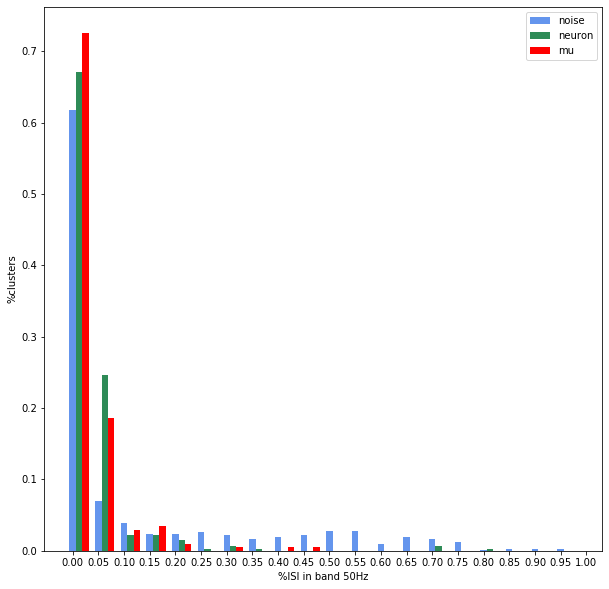

In [64]:
fig, ax = plt.subplots(figsize = (10,10))
bins = np.linspace(0,1,21)
neuron_heights,neuron_bins = np.histogram(Neuron_pc,bins = bins)
noise_heights,noise_bins = np.histogram(Noise_pc,bins = neuron_bins)
mu_heights,mu_bins = np.histogram(MU_pc,bins = neuron_bins)
width = (noise_bins[1] - noise_bins[0])

neuron_heights = neuron_heights/sum(neuron_heights)
noise_heights = noise_heights/sum(noise_heights)
mu_heights = mu_heights/sum(mu_heights)

width = (noise_bins[1] - noise_bins[0])/4

ax.bar(noise_bins[:-1], noise_heights, width=width, facecolor='cornflowerblue',label = "noise")
ax.bar(neuron_bins[:-1]+width, neuron_heights, width=width, facecolor='seagreen',label = "neuron")
ax.bar(neuron_bins[:-1]+2*width, mu_heights, width=width, facecolor='red',label = "mu")
plt.legend()
plt.xticks(neuron_bins)
ax.set_xlabel("%ISI in band 50Hz")
ax.set_ylabel("%clusters")
s = np.min(np.concatenate([np.argwhere(neuron_heights == 0),np.argwhere(mu_heights == 0)]))
print(np.sum(noise_heights[s:]))

In [61]:
np.sum(noise_heights[5:])

0.22666666666666668

## Signal Power

In [65]:
data["power_processing"] = data.Mean.apply(lambda row: np.mean(row**2))
A = data

<BarContainer object of 19 artists>

<BarContainer object of 19 artists>

<BarContainer object of 19 artists>

([<matplotlib.axis.XTick at 0x7fd8efd884d0>,
 <a list of 20 Text xticklabel objects>)

(0, 1000)

Text(0.5, 1.0, 'power_signal')

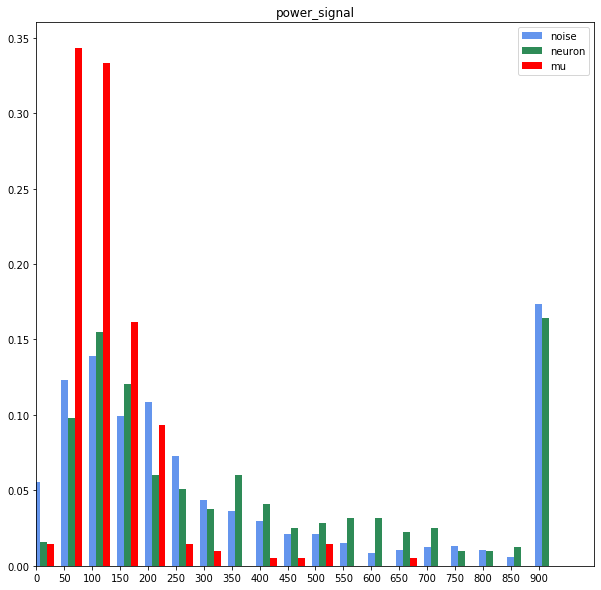

In [71]:
fig, ax = plt.subplots(figsize = (10,10))
bins = np.arange(0,1000,50)
bins[-1] = 90000
neuron_heights,neuron_bins = np.histogram(data[data.bNoise == 0].power_processing,bins = bins)
noise_heights,noise_bins = np.histogram(data[data.bNoise == 1].power_processing,bins = neuron_bins)
mu_heights,mu_bins = np.histogram(data[data.bNoise == 2].power_processing,bins = neuron_bins)

width = (noise_bins[1] - noise_bins[0])

neuron_heights = neuron_heights/(sum(neuron_heights))
noise_heights = noise_heights/(sum(noise_heights))
mu_heights = mu_heights/(sum(mu_heights))

width = (noise_bins[1] - noise_bins[0])/4

ax.bar(noise_bins[:-1], noise_heights, width=width, facecolor='cornflowerblue',label = "noise")
ax.bar(neuron_bins[:-1]+width, neuron_heights, width=width, facecolor='seagreen',label = "neuron")
ax.bar(neuron_bins[:-1]+2*width, mu_heights, width=width, facecolor='red',label = "mu")
plt.legend()
plt.xticks(neuron_bins)
plt.xlim(0,1000)
plt.title("power_signal")

In [30]:
neuron_bins

array([    0,    50,   100,   150,   200,   250,   300,   350,   400,
         450,   500,   550,   600,   650,   700,   750,   800,   850,
         900, 90000])

In [31]:
np.min([[1,2,3],[0,2,4]])

0

## Number of spikes

In [67]:
data["Counts"] = data.Bulk.apply(lambda row: len(row))

<BarContainer object of 19 artists>

<BarContainer object of 19 artists>

<BarContainer object of 19 artists>

(-100, 10000)

Text(0.5, 1.0, 'Counts')

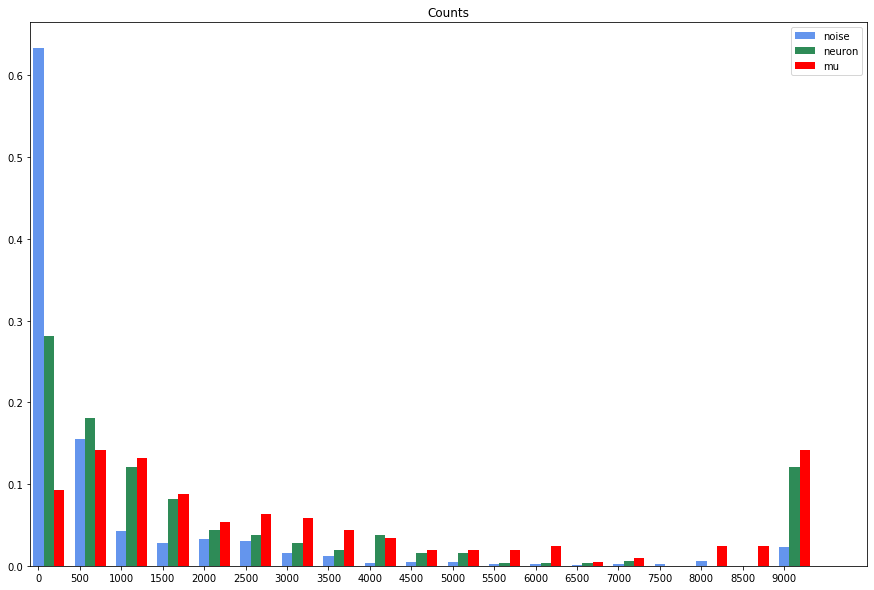

In [97]:
fig, ax = plt.subplots(figsize = (15,10))
bins = np.arange(0,10000,500)
bins[-1] = 10000000
neuron_heights,neuron_bins = np.histogram(data[data.bNoise == 0].Counts,bins = bins)
noise_heights,noise_bins = np.histogram(data[data.bNoise == 1].Counts,bins = neuron_bins)
mu_heights,mu_bins = np.histogram(data[data.bNoise == 2].Counts,bins = neuron_bins)

width = (noise_bins[1] - noise_bins[0])

neuron_heights = neuron_heights/(sum(neuron_heights))
noise_heights = noise_heights/(sum(noise_heights))
mu_heights = mu_heights/(sum(mu_heights))

width = (noise_bins[1] - noise_bins[0])/4

ax.bar(noise_bins[:-1], noise_heights, width=width, facecolor='cornflowerblue',label = "noise")
ax.bar(neuron_bins[:-1]+width, neuron_heights, width=width, facecolor='seagreen',label = "neuron")
ax.bar(neuron_bins[:-1]+2*width, mu_heights, width=width, facecolor='red',label = "mu")
plt.legend()
u = plt.xticks(neuron_bins)
plt.xlim(-100,10000)
plt.title("Counts")

In [94]:
np.sum(neuron_heights[1:])

0.7183544303797468

### Width

In [208]:
def width(Mean_spike):
    
    i = 19
    half_height = Mean_spike[i]/2
    
    a = Mean_spike - half_height
    a1 = a[:19]
    a2 = a[19:]

    x1 = np.arange(0,i)
    spl = UnivariateSpline(x1, a1)
    xs1 = np.linspace(0,i, 10000)
    spl1 = spl(xs1)
    
    x2 = np.arange(i,len(Mean_spike))
    spl = UnivariateSpline(x2, a2)
    xs2 = np.linspace(i,len(Mean_spike), 10000)
    spl2 = spl(xs2)
    
    cross_list = np.argwhere(np.abs(spl1) < .1).T[0]
    if len(cross_list) == 0: first = 0
    else:
        first = np.max(cross_list)
        first = xs1[first]
    
    cross_list = np.argwhere(np.abs(spl2) < 1).T[0]
    if len(cross_list) == 0: second = len(Mean_spike)
    else:
        second = np.min(cross_list)
        second = xs2[second]
    
    width = second - first
    return width
    

<BarContainer object of 20 artists>

<BarContainer object of 20 artists>

<BarContainer object of 20 artists>

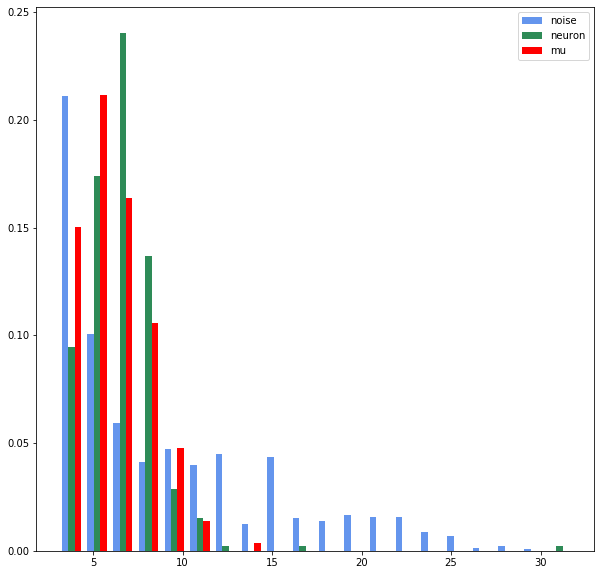

In [210]:
data["Width"] = data.Mean.apply(width)
fig, ax = plt.subplots(figsize = (10,10))
neuron_heights,neuron_bins = np.histogram(data[data.bNoise == 0].Width,bins = 20)
noise_heights,noise_bins = np.histogram(data[data.bNoise == 1].Width,bins = neuron_bins)
mu_heights,mu_bins = np.histogram(data[data.bNoise == 2].Width,bins = neuron_bins)

width = (noise_bins[1] - noise_bins[0])

neuron_heights = neuron_heights/(sum(neuron_heights)*width)
noise_heights = noise_heights/(sum(noise_heights)*width)
mu_heights = mu_heights/(sum(mu_heights)*width)

width = (noise_bins[1] - noise_bins[0])/4

ax.bar(noise_bins[:-1], noise_heights, width=width, facecolor='cornflowerblue',label = "noise")
ax.bar(neuron_bins[:-1]+width, neuron_heights, width=width, facecolor='seagreen',label = "neuron")
ax.bar(neuron_bins[:-1]+2*width, mu_heights, width=width, facecolor='red',label = "mu")
plt.legend()

In [177]:
data['derivative_max'] = data.Mean.apply(lambda row: max(np.gradient(row)))

plt.title("Max derivative")

16.6986986986987
20.8018018018018


4.103103103103102

<Figure size 432x288 with 0 Axes>

5

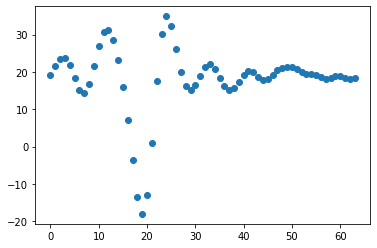

In [167]:
plt.figure()
plt.scatter(np.arange(64),Mean_spike - Mean_spike[i]/2)
22 - 17

In [211]:
data.to_pickle("Datos/PCCIBbMZASDPCInbW")

<Figure size 720x720 with 0 Axes>

(15, 21)

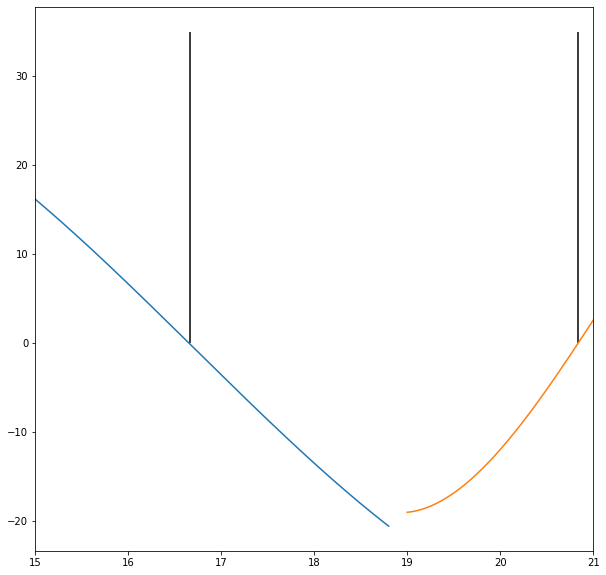

In [206]:
    
i = 19
half_height = Mean_spike[i]/2
   
a = Mean_spike - half_height
a1 = a[:19]
a2 = a[19:]

x1 = np.arange(0,i)
spl = UnivariateSpline(x1, a1)
xs1 = np.linspace(0,i-.2, 10000)
spl1 = spl(xs1)
    
x2 = np.arange(i,len(Mean_spike))
spl = UnivariateSpline(x2, a2)
xs2 = np.linspace(i,len(Mean_spike), 10000)
spl2 = spl(xs2)

h1 = np.max(np.argwhere(np.abs(spl1) < .1))
h2 = np.min(np.argwhere(np.abs(spl2) < .1))


plt.figure(figsize=(10,10))
plt.vlines([xs1[h1],xs2[h2]],[0,0],[35,35])
plt.xlim(15,21)
plt.plot(xs1,spl1)
plt.plot(xs2,spl2)
